<a href="https://colab.research.google.com/github/KrishnaNayik/Hotel_Booking_Analysis-EDA-Capstone_Project/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing the important python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

  Mounting drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone projects/Project 1 EDA/Hotel Bookings.csv')

In [4]:
#Haviing first look at data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We can see here that some columns like 'children', 'company', 'country' and 'agent' have null values.

In [8]:
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Lets have look at all important columns to see the categorical data

In [10]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [11]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [12]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [13]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [14]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [15]:
df['is_canceled'].unique()

array([0, 1])

In [16]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [17]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [18]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

#Data Wrangling
Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:
1. Removing duplicate rows
2. Handling NULL values
3. Converting columns to appropriate datatypes.
4. Adding important columns


In [19]:
#lets create a copy of data for all our future analysis
df1=df.copy()
df1.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


#Step 1: Removing duplicate rows if any

In [20]:
df1.shape

(119390, 32)

In [21]:
# Show no. of of duplicate rows
df1[df1.duplicated()].shape 

(31994, 32)

In [22]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

# shape after dropping duplicate rows 
df1.shape

(87396, 32)

#Step2: Handling NULL values.

In [23]:
# get the columns having missing values.
df1.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


in some cases when customer didnt booked hotel via any agent or via any company these columns can take nul values, So lets replace null values by 0 in these columns.

In [24]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [25]:
#cildren column
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

as 0 option is there,'nan' values here are the missing values due to error of recording data. so lets replace the null values under this column with mean value of children.

In [26]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

'country' coulmn represents the country of oriigin of customer lets replace the missing values with 'other'.

In [27]:
df1['country'].fillna('other', inplace = True)

In [28]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

the total no. of adults,children & babies can't be zero. so lets remove such rows if any.

In [29]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 32)

In [30]:
# getting the index of rows with such data
index_rows=df1[df1['adults']+df1['babies']+df1['children'] == 0].index
index_rows

Int64Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,
             32029,  32827,
            ...
            112471, 112558, 113188, 114583, 114908, 115029, 115091, 116251,
            116534, 117087],
           dtype='int64', length=166)

In [31]:
# deleting theese rows
df1.drop(index_rows, inplace= True)

In [32]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(0, 32)

#Step 3: Converting columns to appropriate datatypes.

In [33]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

In [34]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

#Step 4: Adding important columns.

In [35]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

In [36]:
# Adding total stay days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

In [37]:
df1.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0


#EDA

###separating the Resort and City hotel data for their respective analysis.
(with filtering out cancelled Bookings)

In [38]:
resort = df1[(df1["hotel"] == "Resort Hotel") & (df1["is_canceled"] == 0)]
city = df1[(df1["hotel"] == "City Hotel") & (df1["is_canceled"] == 0)]

In [39]:
resort.shape

(25982, 34)

In [40]:
city.shape

(37239, 34)

###Lets first find the correlation between the numerical data.

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [41]:
num_resort = resort[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces', 'total_of_special_requests','total_stay','total_people']]

In [42]:
num_city = city[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces', 'total_of_special_requests','total_stay','total_people']]

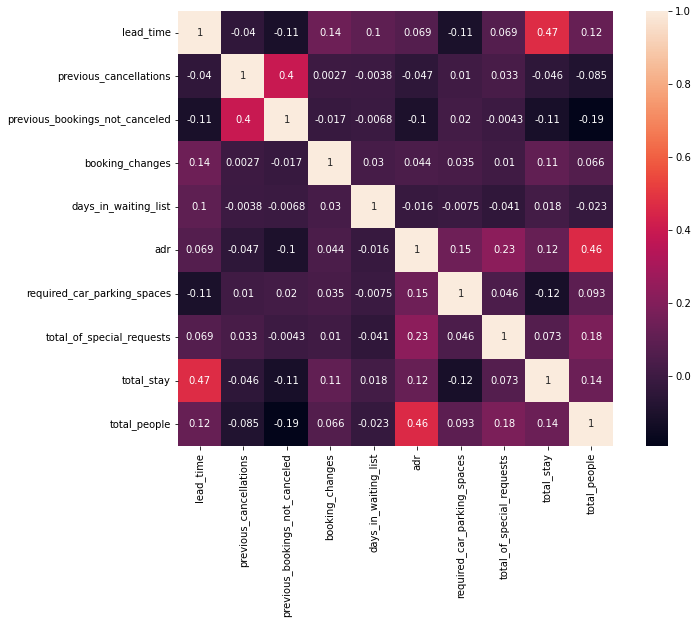

In [43]:
#correlation matrix for Resort data
corrmat = num_resort.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmat,annot = True, square=True);

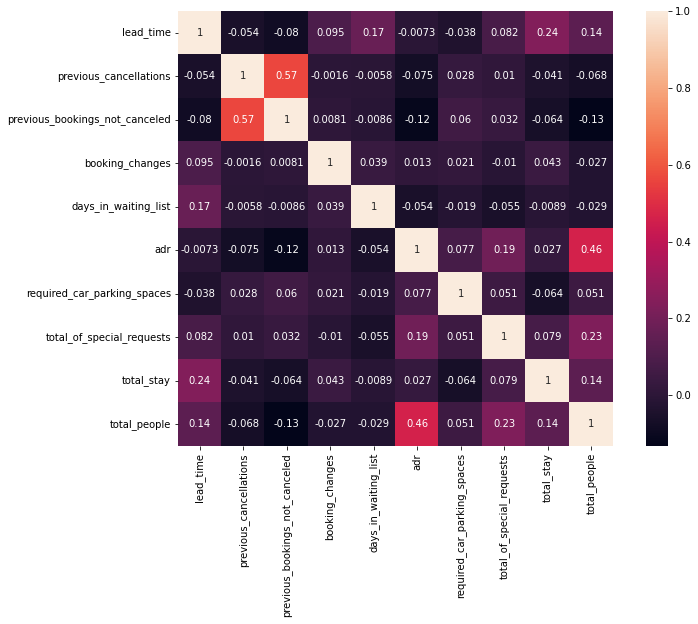

In [44]:
#correlation matrix for city data
corrmat = num_city.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmat,annot = True, square=True);

1) for Resort hotel data, Total stay length and lead time have nearly moderate correlation(0.47). This may means that for longer hotel stays people generally plan few days before the the actual arrival. but for city hotel data this correlation is weak(0.24).

2) adr has nearly moderate correlation(0.46) with total_people in both resort hotel data and city hotel data, which makes sense as more no. of people means more revenue, therefore more adr.

## Customers come from which countries the most?

In [45]:
country_wise_data=df1[df1['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','No of guests']
data=country_wise_data.sort_values(by='No of guests', ascending=False)[:20]
data

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
5,IRL,2347
6,ITA,1986
7,BEL,1670
8,NLD,1560
9,USA,1412


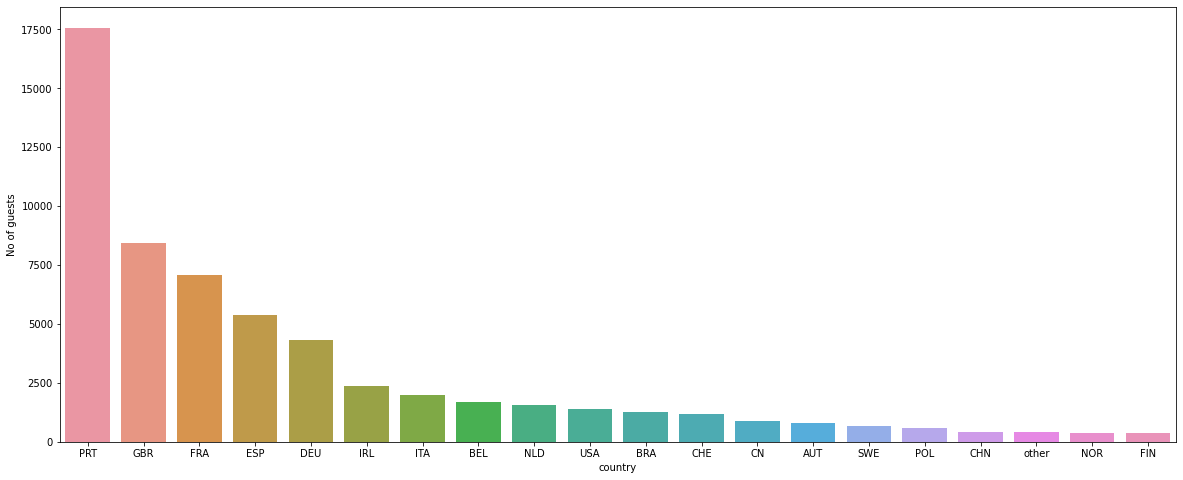

In [46]:
plt.figure(figsize=(20,8))
sns.barplot (x = 'country' , y  = 'No of guests', data=data)
plt.show()

In [47]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [48]:
# show on map
map_guest = px.choropleth(country_wise_data,
                    locations=country_wise_data['country'],
                    color=country_wise_data['No of guests'], 
                    hover_name=country_wise_data['country'], 
                    title="Home country of guests")
map_guest.show()

from bar chart & map it is clear that:
Most customers are from Portugal and other Europian contries.

###How much do guests pay for a room per night?

In [49]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union, lets assume that all prices are in EUR.

In [50]:
#lets create df2 to consider only those bookings which are NOT cancelled.
df2=df1[df1['is_canceled']==0]

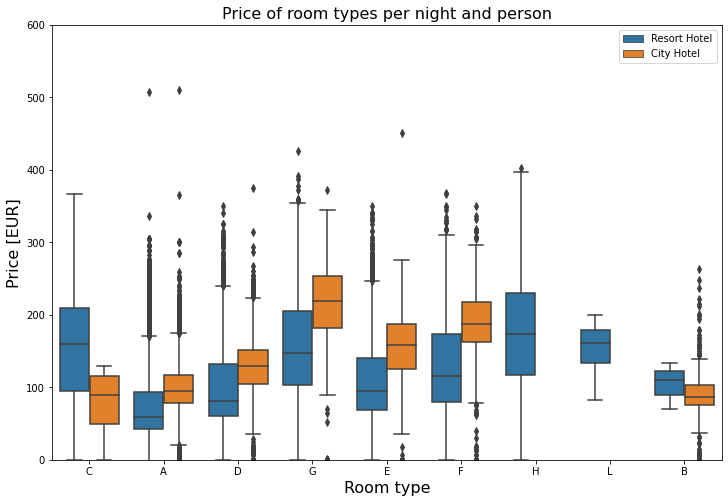

In [51]:
# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr",
            hue="hotel",
            data=df2)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 600)
plt.show()

This figure shows the median price per room, depending on its type and the standard deviation.

room type G in city hotel has recorded the highest median price among all other room types.

Note that rooms with the same type letter may not necessarily be the same across hotels and hence prices may vary accordingly.

###How does the price per night vary over the year across hotels?

In [52]:
resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [53]:
resort_hotel=resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,76.841664
1,August,182.103524
2,December,64.072826
3,February,53.624311
4,January,48.599615
5,July,150.914540
6,June,109.026942
7,March,57.110018
8,May,77.725129
9,November,48.956548


In [54]:
city_hotel=city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,114.251636
1,August,122.825388
2,December,90.769559
3,February,88.210810
4,January,83.378062
5,July,120.069489
6,June,120.673753
7,March,91.306933
8,May,124.825944
9,November,88.271089


In [55]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,76.841664,114.251636
1,August,182.103524,122.825388
2,December,64.072826,90.769559
3,February,53.624311,88.210810
4,January,48.599615,83.378062
5,July,150.914540,120.069489
6,June,109.026942,120.673753
7,March,57.110018,91.306933
8,May,77.725129,124.825944
9,November,48.956548,88.271089


In [56]:
#to provide right hierarchy to the month column
!pip install sort-dataframeby-monthorweek

## Dependency package needs to be installed
!pip install sorted-months-weekdays


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=fe23b20317b4e19ec7099b94c970b8eea247b5627496f6989c65166ad4e43974
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=36649ac343f67889370ace11464ec8c293fa3846c591cb6c4249e97095819f51
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [57]:
import sort_dataframeby_monthorweek as sd

In [58]:
final=sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

,month,price_for_resort,price_for_city_hotel
0,January,48.599615,83.378062
1,February,53.624311,88.210810
2,March,57.110018,91.306933
3,April,76.841664,114.251636
4,May,77.725129,124.825944
5,June,109.026942,120.673753
6,July,150.914540,120.069489
7,August,182.103524,122.825388
8,September,98.855456,116.973279
9,October,62.634853,105.517410


In [59]:
px.line(final, x='month', y=['price_for_resort','price_for_city_hotel'], title='Room price per night over the Months')

the lineplot clearly shows that:

1.the prices in the Resort hotel are much higher during the mid summer(jul-Aug-sept). 

2.The price of the city hotel varies less and become most expensive during the period between spring and autumn(March--Sept).

## Distribution of 'Total stay'  at Hotels by Market Segment and Hotel Type

In [60]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


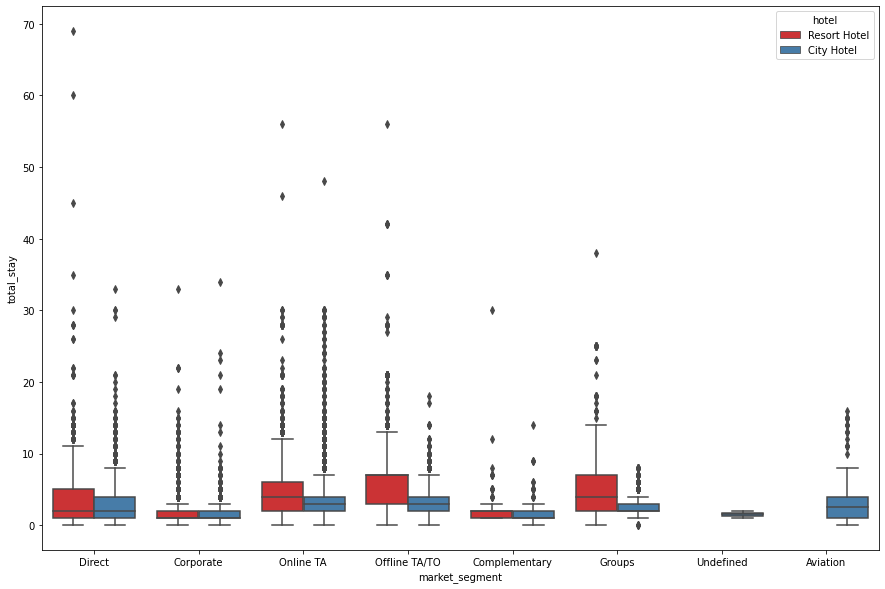

In [61]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "total_stay", data = df1, hue = "hotel", palette = 'Set1');

It can be seen that most of the groups have positice skewness.

Looking at the distribution, most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12-13 days(except for 'Corporate' & 'complimentary' bookings).

so it is obvious that when people go to resort hotels, they prefer to stay more.

###How long do people stay at the hotels?

In [62]:
stay = df2.groupby(['total_stay', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number_of_bookings'})
stay

,total_stay,hotel,Number_of_bookings
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


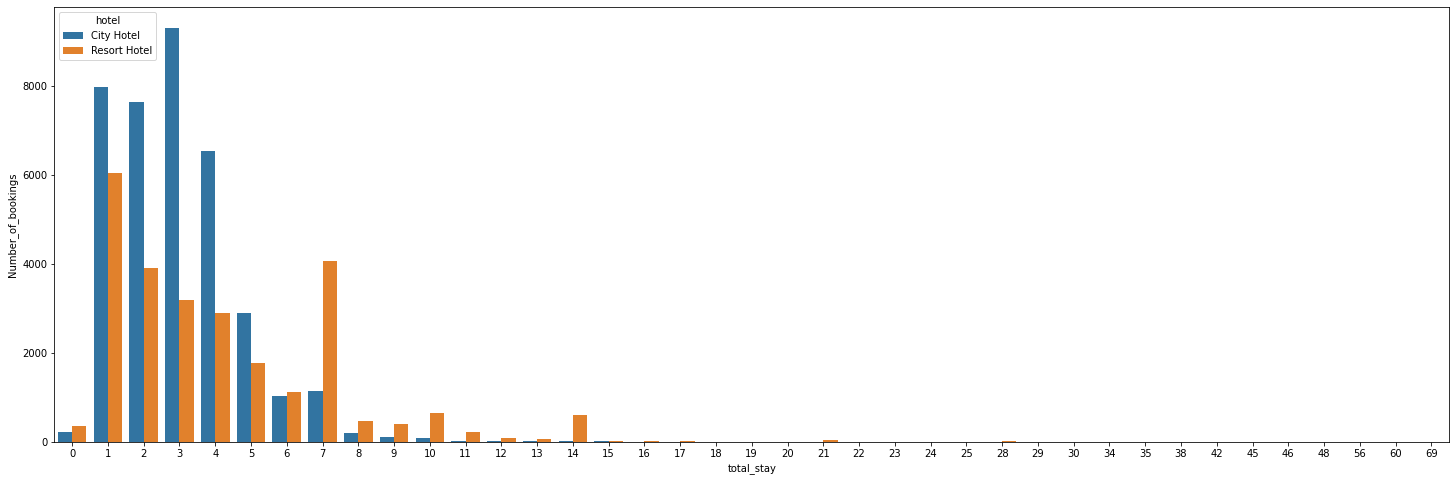

In [63]:
plt.figure(figsize=(25,8))
sns.barplot(x = 'total_stay', y = 'Number_of_bookings',data= stay,hue='hotel')
plt.show()

Most people prefer to stay at the hotels for  <=7 days.

### Analysing Preference of Guests for meals:

In [64]:
df1['meal'].value_counts()

BB           67907
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64

In [65]:
px.pie(df1,names=df1['meal'].value_counts().index,values=df1['meal'].value_counts().values)

There is a big difference in the BB(Bed&Breakfast) category and the others. Almost 80% of bookings are reserved for BB.

####Preference of Guests for meals based on hotel type.

In [66]:
df1.groupby(['hotel','meal']).agg({'meal':'count'}).unstack()

meal                                 
meal               BB     FB      HB      SC Undefined
hotel                                                 
City Hotel    41160.0   11.0  2786.0  9317.0       NaN
Resort Hotel  26747.0  349.0  6294.0    74.0     492.0

##Analysing Special Request done by Customers:

In [67]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


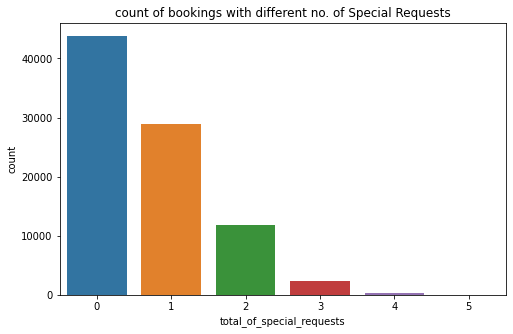

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(x=df1['total_of_special_requests'])
plt.title('count of bookings with different no. of Special Requests')
plt.show()

In [69]:
df1.shape

(87230, 34)

moere than 50% of bookings (ie ~45k out of 87k) do not have any special requests. which means less than 50% of the bookings make special request.

####Analyzing booking cancelalations wrt special requests

In [70]:
pivot=df1.groupby([ 'total_of_special_requests', 'is_canceled']).agg({'is_canceled':'count'}).rename(columns={'is_canceled':'count'}).unstack()
pivot

count       
is_canceled                    0      1
total_of_special_requests              
0                          29228  14561
1                          22475   6501
2                           9280   2515
3                           1918    396
4                            286     34
5                             34      2

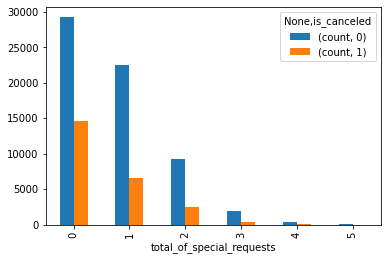

In [71]:
pivot.plot(kind='bar')

 of the nearly 45k bookings which were without any special requests, 1/3rd  (~15k) of them have been cancelled.

##Which are the most busy month or in which months Guests are high?

In [72]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [73]:
rush_resort=resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no of guests']
rush_resort

,month,no of guests
0,August,3153
1,July,3013
2,May,2246
3,October,2209
4,March,2191
5,April,2169
6,February,2053
7,June,1926
8,September,1875
9,November,1744


In [74]:
rush_city=city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guests']
rush_city

,month,no of guests
0,August,4467
1,July,3834
2,May,3656
3,June,3477
4,March,3469
5,April,3325
6,September,3166
7,October,3070
8,February,2618
9,November,2177


In [75]:
final_rush=rush_resort.merge(rush_city,on='month')
final_rush.columns=['month','no of guests in resort','no of guest in city hotel']
final_rush

,month,no of guests in resort,no of guest in city hotel
0,August,3153,4467
1,July,3013,3834
2,May,2246,3656
3,October,2209,3070
4,March,2191,3469
5,April,2169,3325
6,February,2053,2618
7,June,1926,3477
8,September,1875,3166
9,November,1744,2177


In [76]:
final_rush=sd.Sort_Dataframeby_Month(df=final_rush,monthcolumnname='month')
final_rush

,month,no of guests in resort,no of guest in city hotel
0,January,1687,1961
1,February,2053,2618
2,March,2191,3469
3,April,2169,3325
4,May,2246,3656
5,June,1926,3477
6,July,3013,3834
7,August,3153,4467
8,September,1875,3166
9,October,2209,3070


In [77]:
px.line(data_frame=final_rush, x='month', y=['no of guests in resort','no of guest in city hotel'], title='Total no of guests per Months')

Both hotels have highest no. of bookings in August month. and have lowest bookings in the months of December & January.

Both hotels have the fewest guests during the winter(Nov--Feb).

The City hotel has more guests during the period between spring and autumn, when the prices are also highest as seen before.


### ADR trend over the year

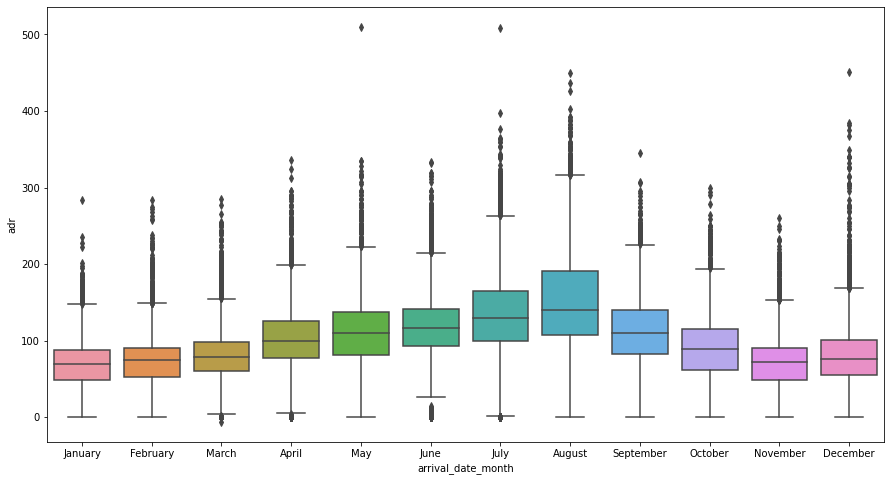

In [78]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'],categories=reindex,ordered=True)
df1['adr']=df1['adr'][df1['adr']<4000] #filtering the outlier for better visualization


plt.figure(figsize = (15,8))
sns.boxplot(x = df1['arrival_date_month'],y = df1['adr'])
plt.show()

Avg adr rises from beginning of year upto middle of year and reaches peak at August and then lowers to the end of year to stabilise at the same price as the beigining of year.

## Bookings by market segment

In [79]:
#considering df2,ie Not_Cancelled Bookings 
df2['market_segment'].value_counts()

Online TA        33311
Offline TA/TO    11798
Direct           10043
Corporate         3691
Groups            3590
Complementary      607
Aviation           181
Name: market_segment, dtype: int64

In [80]:
# pie plot
fig=px.pie(df2,
             values=df2['market_segment'].value_counts().values,
             names=df2['market_segment'].value_counts().index,
             title="Bookings per market segment")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

more than **50% of the bookings were made in 'online TA'** market segment **alone**.





##Booking cancellation Analysis
#####Which month have the highest number of cancellations?

In [81]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [82]:
cancellation=df1[df1['is_canceled']==1]
cancellation.shape

(24009, 34)

In [83]:
cancellation['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [84]:
cancel_month=df1.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancelled=cancel_month.iloc[:,0:3]

In [85]:
cancelled

,arrival_date_month,hotel,is_canceled
0,January,City Hotel,2724
1,January,Resort Hotel,1961
2,February,City Hotel,3591
3,February,Resort Hotel,2492
4,March,City Hotel,4833
5,March,Resort Hotel,2656
6,April,City Hotel,5072
7,April,Resort Hotel,2828
8,May,City Hotel,5402
9,May,Resort Hotel,2942


In [86]:
cancelled=cancelled.rename(columns={'is_canceled':'no of cancellations'})
cancelled

,arrival_date_month,hotel,no of cancellations
0,January,City Hotel,2724
1,January,Resort Hotel,1961
2,February,City Hotel,3591
3,February,Resort Hotel,2492
4,March,City Hotel,4833
5,March,Resort Hotel,2656
6,April,City Hotel,5072
7,April,Resort Hotel,2828
8,May,City Hotel,5402
9,May,Resort Hotel,2942


In [87]:
final=sd.Sort_Dataframeby_Month(cancelled,'arrival_date_month')
final

,arrival_date_month,hotel,no of cancellations
0,January,City Hotel,2724
1,January,Resort Hotel,1961
2,February,City Hotel,3591
3,February,Resort Hotel,2492
4,March,City Hotel,4833
5,March,Resort Hotel,2656
6,April,City Hotel,5072
7,April,Resort Hotel,2828
8,May,City Hotel,5402
9,May,Resort Hotel,2942


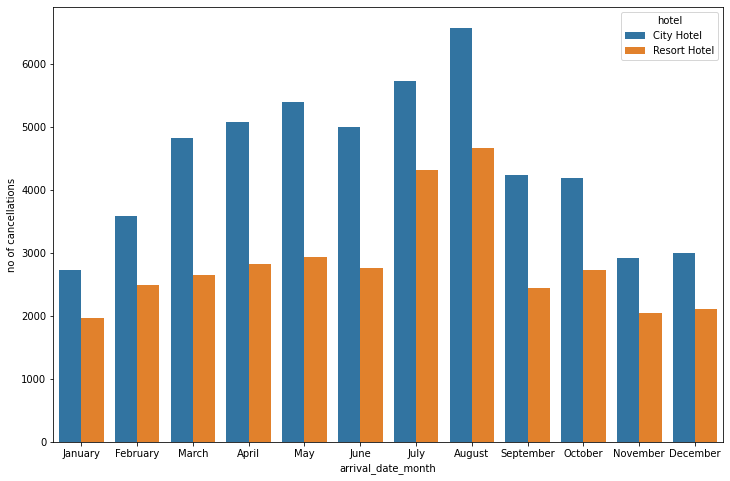

In [88]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "arrival_date_month", y = "no of cancellations" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=final)

For both the hotels no. of cancellations are highest in the summer(Jul--Aug) and lowest during the winter(Nov-Dec-Jan).



##checking whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

In [89]:
def check_room_allot(x):
  if x['reserved_room_type'] == x['assigned_room_type']:
    return 1
  else:
    return 0
df1['same_room_alloted'] = df1.apply(lambda x : check_room_allot(x), axis = 1)
df1.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay,same_room_alloted
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0,1


In [90]:
grp_by_canc = df1.groupby('is_canceled')
grp_by_canc['same_room_alloted'].sum()


is_canceled
0    50847
1    23393
Name: same_room_alloted, dtype: int64

In [91]:
D3 = pd.DataFrame((grp_by_canc['same_room_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_alloted_%'})
D3['same_room_alloted_%']

is_canceled
0    80.427390
1    97.434295
Name: same_room_alloted_%, dtype: float64

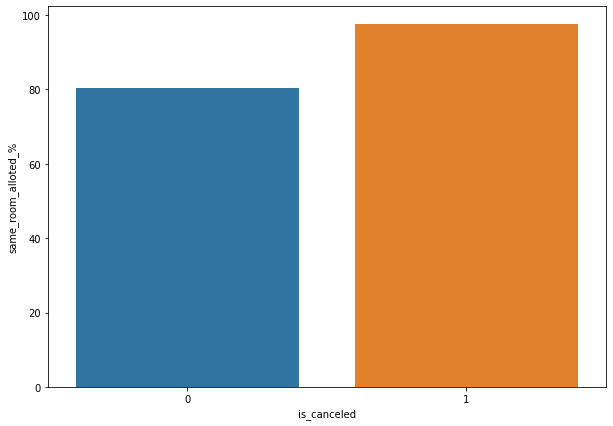

In [92]:
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_alloted_%'])
plt.show()

of all those bookings which were cancelled, about 97% bookings were allotted the same room type as demanded,yet they were cancelled. hence not getting same room as demanded is not the case of cancellation of rooms for about 97% of the bookings.

only about 3% of the cancelled bookings were not alloted the same room type as demanded by customers.